## 1. Introduction

---

Gradded Challenge 7

Name : Ogi Hadicahyo

Batch  : HCK - 012 (Phase 1)

Link Hugging Face: <a href="https://huggingface.co/spaces/OgiHadicahyo/Sentiment_Prediction"> Hugging Face</a>.

---

**Background**

I am a data scientist studying at Hacktive8 campus. While exploring various datasets available on the Kaggle platform, I came across an interesting dataset regarding user sentiment towards apps on the Google Play Store. This dataset contains text reviews from application users who provide positive, negative, or neutral ratings or sentiments towards the applications they use.

This dataset is interesting to me because I am interested in creating a Natural Language Processing (NLP) model that can predict sentiment from user text reviews of apps on the Google Play Store. Using NLP models, I can perform further analysis of user reviews and understand the underlying sentiment patterns. Additionally, this model can also be useful for app developers to understand user feedback and improve the quality of their apps based on the reviews provided. Therefore, I decided to create an NLP model to predict sentiment from user reviews on Google Play Store using a dataset I found on Kaggle.

**Problem Statement**

Develop a Natural Language Processing (NLP) model to predict user sentiment from text reviews of apps on the Google Play Store. This model aims to provide app developers with a valuable tool for automatically analyzing and understanding user sentiment towards their apps. By accurately predicting user sentiment, developers can gain insights into user preferences and concerns, enabling them to improve app features, address issues, and enhance overall user satisfaction.

**Dataset**
- Link Dataset: <a href="https://www.kaggle.com/datasets/whenamancodes/play-store-apps/data"> Kaggle</a>.
- Title : P2G7_Ogi_Hadicahyo.csv

| Column | Description |
| --- | --- |
| App	| Name of app |
| Translated Reviews	| User review (Preprocessed and translated to English) |
| Sentiment	| Positive/Negative/Neutral (Preprocessed) |
| Sentiment_polarity | Sentiment polarity score |
| Sentiment_subjectivity	| Sentiment subjectivity score |

## 2. Import Libraries and Function

The first step that needs to be done is ***import libraries***. ***Importing libraries*** makes it easier to reuse code, simplify complex tasks, organize code into smaller parts, use optimal and reliable solutions, and ensure consistency and compatibility across projects and programming languages.

### 2.1 Import Libraries

The first step that needs to be done is ***import libraries***. ***Importing libraries*** makes it easier to reuse code, simplify complex tasks, organize code into smaller parts, use optimal and reliable solutions, and ensure consistency and compatibility across projects and programming languages.

In [2]:
# Basic Library
import pandas as pd
import numpy as np

# Library for Preprocess
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from collections import Counter

# Library for Visualization
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns

#models
import tensorflow as tf
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, Dense, Dropout, LSTM, TextVectorization, SimpleRNN
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

# etc
import warnings
from joblib import dump

# Library for warnings
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

In [3]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Ogi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Ogi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Ogi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

### 9.2 Function

In [4]:
# Stop words 
stop_words = set(stopwords.words('english'))

# preprocessing function
def preprocess_text(text):
    lemmatizer = WordNetLemmatizer()          # Define Lemmatizer
    text = text.lower()                       # Lowercase text
    text = text.strip()
    text = re.sub("[^A-Za-z\s']", "", text)  # Non-letter removal (such as emoticon, symbol (like μ, $, 兀), etc
    tokens = word_tokenize(text)              # Tokenize
    filtered_words = [word for word in tokens if word not in stop_words]        # Stopwords Removal
    lemmatized_words = [lemmatizer.lemmatize(w) for w in filtered_words]        # Changing words to their basic form (lemmatization)
    lemmatized_clean = [word.translate(str.maketrans('', '', string.punctuation)) for word in lemmatized_words] # Cleans the text from punctuation marks
    return ' '.join(lemmatized_clean)

# function for plotting result
def plot_result(result):
  result_df = pd.DataFrame(result.history)
  plt.figure(figsize=(15, 5))
  
  # Subplot 1: Accuracy vs Val-Accuracy
  plt.subplot(1, 2, 1)
  sns.lineplot(data=result_df[['accuracy', 'val_accuracy']])
  plt.grid(color='black', linestyle='--', alpha=0.7)
  plt.tight_layout()
  plt.title('Accuracy vs Val-Accuracy', color='black')
  plt.xlabel('Epoch', fontsize=12, color='black')
  plt.ylabel('Accuracy', fontsize=12, color='black')
  legend = plt.legend()
  plt.setp(legend.get_texts(), color='black')
  
  # Subplot 2: Loss vs Val-Loss
  plt.subplot(1, 2, 2)
  sns.lineplot(data=result_df[['loss', 'val_loss']])
  plt.grid(color='black', linestyle='--', alpha=0.7)
  plt.tight_layout()
  plt.title('Loss vs Val-Loss', color='black')
  plt.xlabel('Epoch', fontsize=12, color='black')
  plt.ylabel('Loss', fontsize=12, color='black')
  legend = plt.legend()
  plt.setp(legend.get_texts(), color='black')
  
  plt.subplots_adjust(wspace=0.1)
  plt.show()

# function for evaluation report
def performance_check(model, X, y_ohe):
  display_labels =['Positive', 'Neutral', 'Negative']
  y_pred = model.predict(X)
  predictions = np.argmax(y_pred, axis=1)
  labels = np.argmax(y_ohe, axis=1)

  cm = confusion_matrix(labels, predictions)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=display_labels)
  disp.plot(cmap=plt.cm.Blues)
  plt.show()
  print(classification_report(labels, predictions, target_names=display_labels))

## 3. Data Loading

The data used is Play Store Apps data obtained from Kaggle and then saved in CSV form with the file name P2G7_Ogi_Hadicahyo.csv. First, we will import the dataset .csv file containing the dataset into a Data Frame

In [5]:
# Data Loading
data = pd.read_csv('P2G7_Ogi_Hadicahyo.csv')

---
### 3.1 Data Information

We will see a small overview of the dataset we have by displaying the first and last 10 rows. This step is carried out to be able to understand the contents of the dataset that we have


In [6]:
# Show the first 10 data
print('The first 10 rows data:')
display(data.head(10))

# Show the last 10 data
print('The last 10 rows data:')
display(data.tail(10))

The first 10 rows data:


,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
5,10 Best Foods for You,Best way,Positive,1.00,0.300000
6,10 Best Foods for You,Amazing,Positive,0.60,0.900000
7,10 Best Foods for You,NaN,NaN,NaN,NaN
8,10 Best Foods for You,"Looking forward app,",Neutral,0.00,0.000000
9,10 Best Foods for You,It helpful site ! It help foods get !,Neutral,0.00,0.000000


The last 10 rows data:


,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
64285,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64286,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64287,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64288,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64289,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64290,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64291,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64292,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64293,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64294,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN


The table above is the first and last 10 rows of the dataset that we will use. Now, we will look in more detail about our dataset by displaying a summary of the dataset

In [7]:
# Check the data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


Based on the information above, it can be seen that this dataset has **64295 entries** with ***5 columns***. Additionally, the columns in this dataset are of type *object and float*. In the output above it can also be stated that **there are missing values** in the **'Sentiment', 'Sentiment_Polarity', 'Sentiment_Subjectivity'** columns which only have 37432 rows and the **'Translated_Review'** column which only has 37427 lines. Therefore, we need to handle missing values later.

In [8]:
# Check the number of columns of integer type
integer_columns = len(data.select_dtypes(include='int64').columns)

# Check the number of columns of float type
float_columns = len(data.select_dtypes(include='float64').columns)

# Check the number of columns of object type
object_columns = len(data.select_dtypes(include='object').columns)

# Displays the number of columns of integer, float, and object types
print(f"Number of columns of integer type: {integer_columns}")
print(f"Number of columns of type float: {float_columns}")
print(f"Number of columns of type object: {object_columns}")

Number of columns of integer type: 0
Number of columns of type float: 2
Number of columns of type object: 3


Based on the observations above, the dataset we have consists of **2 float columns** and **3 integer columns**. This dataset does not have columns of type object so we can conclude that all columns have values of numeric type

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


---
### 3.2 Make Adjustments to Existing Data

Data adjustments are carried out to optimize the data we have. The data adjustment process goes through two stages, namely **checking for duplicate data and handling missing value.** *Duplicate data checks are carried out to avoid the presence of the same data in the dataset,* this is done to prevent the model from learning the same data at the model training stage. *Handling missing value is done because in the dataset that we have,* there are two column that have missing value, so we will handle the data to ensure the accuracy and reliability of the analysis results

#### 3.2.1 Check For Duplicate Data

In [10]:
# Counting the amount of data that is potentially the same as other data
data.duplicated().sum()

33616

As a result of calculating the amount of data that is potentially the same as other data, it is known that **there is 33616 data that is the same as other data.** Therefore, we will delete the data because we already have that information

In [11]:
# Delete duplicate data
data = data.drop_duplicates()

# Check again whether there is still data that has the potential to be the same as other data
data.duplicated().sum()

0

We have deleted duplicate data and the data can be used for further processing. Now, the number of **entries in our dataset is 30679 data.**

#### 3.2.2 Handling Missing Value

To deal with missing values, we will first display a summary of column information from the dataset and see which columns have the potential to contain missing values.

In [12]:
# look for None/null values in the dataframe
data.isnull().any()

App                       False
Translated_Review          True
Sentiment                  True
Sentiment_Polarity         True
Sentiment_Subjectivity     True
dtype: bool

Based on the information above, we can see that in our dataset there are missing values in the *'Translated_Review', 'Sentiment', 'Sentiment_Polarity', and 'Sentiment_Subjectivity'* columns. Data containing missing values will be deleted because missing values can damage the prediction model created and reduce the effectiveness of the model in predicting to less than optimal.

In [13]:
# Remove missing values from the dataset
data = data.dropna()

After we delete data that has the potential to have missing values, we will check again to ensure that the remaining data does not contain any more missing values. We will display the summary information from our dataset to check it.

In [14]:
# look for None/null values in the dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29692 entries, 0 to 64230
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     29692 non-null  object 
 1   Translated_Review       29692 non-null  object 
 2   Sentiment               29692 non-null  object 
 3   Sentiment_Polarity      29692 non-null  float64
 4   Sentiment_Subjectivity  29692 non-null  float64
dtypes: float64(2), object(3)
memory usage: 1.4+ MB


It can be seen from the information above that the data we have already has values in each column. Let's move on to the next stage.

In [15]:
# saving for deployment
data.to_csv('eda.csv', index= False)

## 4. Exploratory Data Analysis (EDA)

Before we continue we will copy the original dataset in order to keep the real data in case there is something unwanted during the data Exploration process

In [17]:
data_visualization = data.copy()

### 4.1 Sentiment Distribution

In this Pie Chart Sentiment Distribution, we will display a visualization of the distribution of sentiment in the dataset. Using pie charts, we will show the proportions of sentiment categories such as positive, negative, and neutral. Through this visualization, it will be seen clearly and simply how the overall composition of sentiment in the dataset is

In [18]:
# Data
labels = data_visualization['Sentiment'].value_counts().index
values = data_visualization['Sentiment'].value_counts().values

# Define color sets of paintings
night_colors = ['rgb(56, 75, 126)', 'rgb(18, 36, 37)', 'rgb(34, 53, 101)']

# Create a pie chart
fig = go.Figure(data=[go.Pie(labels=labels, values=values, marker_colors=night_colors)])

# Tune layout and hover info
fig.update_traces(hoverinfo='label', textinfo='percent+value',
                  marker=dict(line=dict(color='#000000', width=2)))
fig.update_layout(title_text='Sentiment Distribution', 
                  title_x=0.5,
                  paper_bgcolor='rgb(240, 240, 240, 0.6)',
                  width=600, height=500,
                  title_font=dict(size=30, family='Arial'))
fig.show()

**The largest segment is Positive**, which covers **64%** of the distribution with a total of **19,015**. **The next largest** is **Negative Sentiment** which accounts for **21.3%** of the distribution with a total of **6,321**. **The smallest segment** is **Neutral Sentiment**, accounting for **14.7%** of the distribution with a count of **4,356**. From these numbers, we can conclude that most of the sentiment in the dataset is positive, indicating that most of the responses, reviews, or comments collected express positive feelings. **Positive sentiment was more common than negative sentiment**, indicating that the sample generally had better or optimistic sentiment.

### 4.2 Sentiment Polarity Distribution

Sentiment Polarity Distribution This visualizes the sentiment polarity distribution in the dataset. Sentiment polarity reflects the positive, negative, or neutral level of the text being evaluated. Through a histogram or distribution plot, we can see how sentiment polarity is spread out in the data. Thus, this visualization will help us gain better insight into how the texts in the dataset are emotionally rated by users.

Text(174.22222222222223, 0.5, 'Frequency')

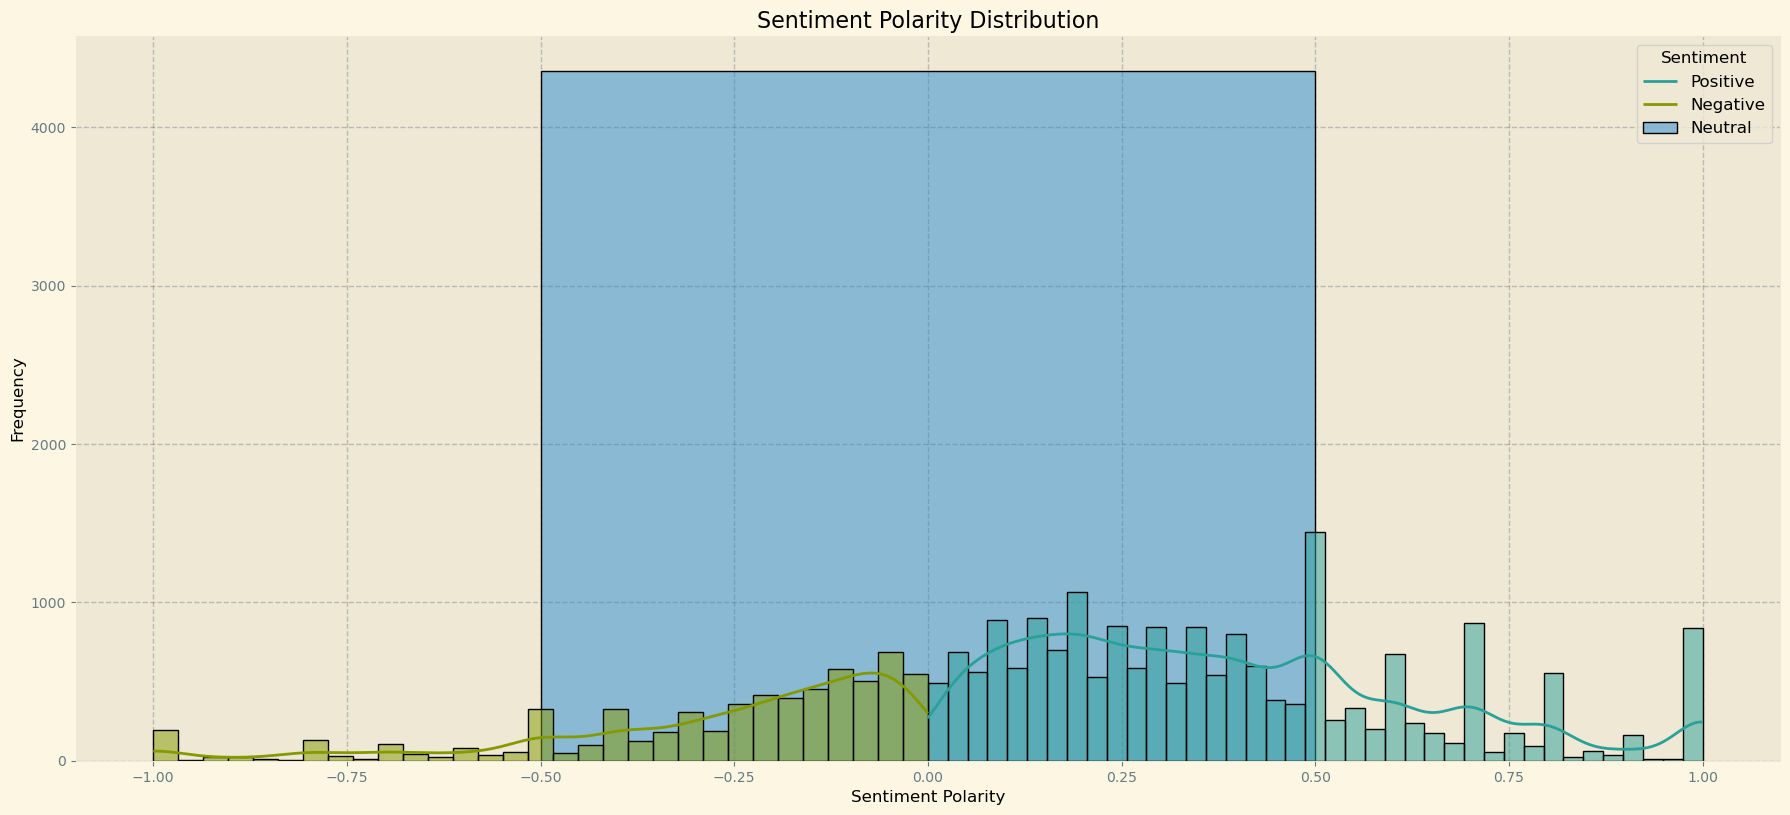

In [69]:
# Divide data_visualization into two groups based on the Exited column
Sentiment_Positive = data_visualization[data_visualization['Sentiment']=='Positive']
Sentiment_Negative = data_visualization[data_visualization['Sentiment']=='Negative']
Sentiment_Neutral = data_visualization[data_visualization['Sentiment']=='Neutral']

# Create a visualization of the age distribution between two groups of customers in the form of a histogram
plt.subplots(figsize=(18,8))
sns.histplot(Sentiment_Neutral['Sentiment_Polarity'],kde=True)
sns.histplot(Sentiment_Positive['Sentiment_Polarity'], kde=True)
sns.histplot(Sentiment_Negative['Sentiment_Polarity'], kde=True)

# Set style
plt.style.use('Solarize_Light2')

# Add gridlines and adjust layout
plt.grid(color='black')
plt.grid(axis='y', linestyle='--', alpha=0.2)
plt.grid(axis='x', linestyle='--', alpha=0.2)
plt.tight_layout()

# Customize legend
legend = plt.legend(['Positive', 'Negative', 'Neutral'], title='Sentiment', fontsize=12, title_fontsize=12)
plt.setp(legend.get_title(), color='black')  
plt.setp(legend.get_texts(), color='black')  

# Add title and labels
plt.title('Sentiment Polarity Distribution', fontsize=16, color='black')  
plt.xlabel('Sentiment Polarity', fontsize=12, color='black')
plt.ylabel('Frequency', fontsize=12, color='black')

- Positive sentiment: The frequency of positive sentiment is higher than negative and neutral sentiment. This shows that overall, the data analyzed has positive sentiment.
- Negative sentiment: The frequency of negative sentiment is low, indicating that negative sentiment is not dominant in the data.
- Neutral sentiment: The frequency of neutral sentiment is relatively low, indicating that the data generally has a positive or negative sentiment.

Image analysis shows that the data analyzed has an overall positive sentiment. Negative and neutral sentiment is low.

### 4.3 Sentimen Subjectivity Distribution

Sentiment Subjectivity Distribution This visualizes the distribution of sentiment subjectivity in the dataset. Sentiment subjectivity describes how subjective or objective a text is based on the user's opinion or view. Through histograms or distribution plots, we can explore the distribution of subjectivity in the data. This visualization will help us understand how users express their opinions or personal views in the evaluated texts, as well as provide an idea of the overall level of subjectivity in the dataset.

Text(174.22222222222223, 0.5, 'Frequency')

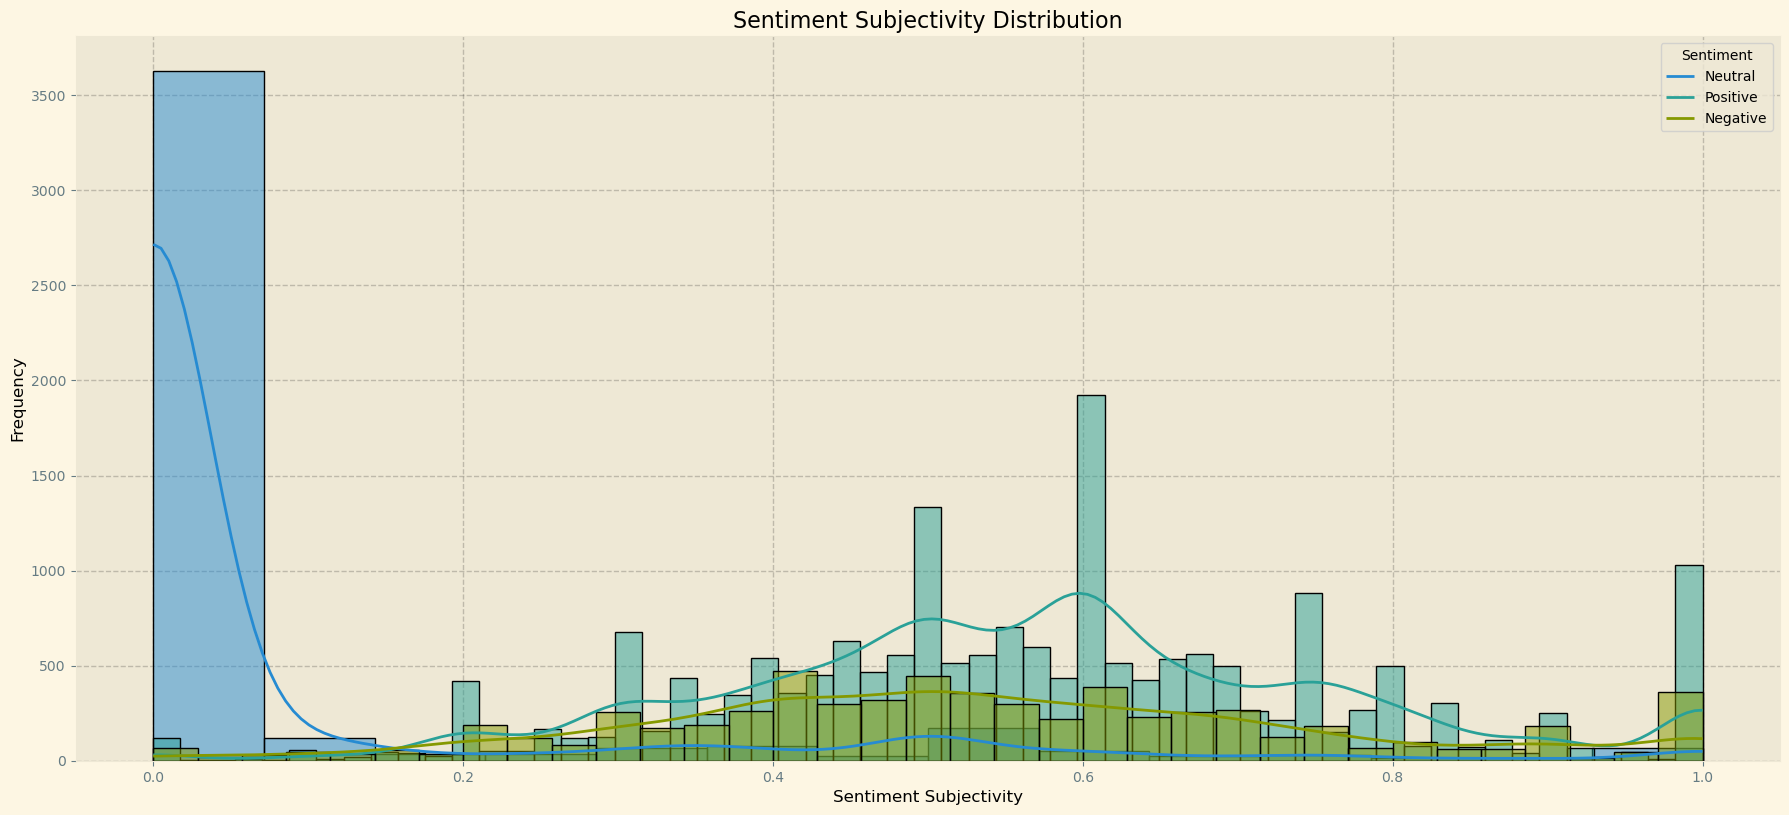

In [68]:
# Divide data_visualization into two groups based on the Exited column
Sentiment_Positive = data_visualization[data_visualization['Sentiment']=='Positive']
Sentiment_Negative = data_visualization[data_visualization['Sentiment']=='Negative']
Sentiment_Neutral = data_visualization[data_visualization['Sentiment']=='Neutral']

# Create a visualization of the age distribution between two groups of customers in the form of a histogram
plt.subplots(figsize=(18,8))
sns.histplot(Sentiment_Neutral['Sentiment_Subjectivity'],kde=True, alpha=0.5)
sns.histplot(Sentiment_Positive['Sentiment_Subjectivity'], kde=True, alpha=0.5)
sns.histplot(Sentiment_Negative['Sentiment_Subjectivity'], kde=True, alpha=0.5)

# Set style
plt.style.use('Solarize_Light2')

# Add gridlines and adjust layout
plt.grid(color='black')
plt.grid(axis='y', linestyle='--', alpha=0.2)
plt.grid(axis='x', linestyle='--', alpha=0.2)

plt.tight_layout()

# Add title and labels
plt.title('Sentiment Subjectivity Distribution', fontsize=16)  
plt.legend(['Neutral','Positive','Negative'],title='Sentiment')
plt.xlabel('Sentiment Subjectivity', fontsize=12, color='black')
plt.ylabel('Frequency', fontsize=12, color='black')

From the observation above, this distribution suggests that a considerable portion of the analyzed sentiments are deemed objective. Subjective sentiments are distributed across the spectrum with a peak in positive sentiments at the higher subjectivity scores. The presence of both neutral and negative sentiments across the subjectivity range indicates a diverse set of opinions and perspectives in the underlying data. The data suggests that while subjective expressions of sentiment are present, they may not dominate the conversation as much as objective statements.

### 4.4 Sentiment Polarity vs Sentiment Subjectivity

We will explore the relationship between sentiment polarity and sentiment subjectivity in the dataset. Sentiment polarity refers to the positive, negative, or neutral level of the text being evaluated, while sentiment subjectivity reflects how subjective or objective the text is based on the user's opinions or views. By depicting the relationship between these two dimensions through a scatter plot, we can explore patterns or trends that may exist between them. This visualization will help us better understand how the level of sentiment polarity changes along with the subjectivity of the text.

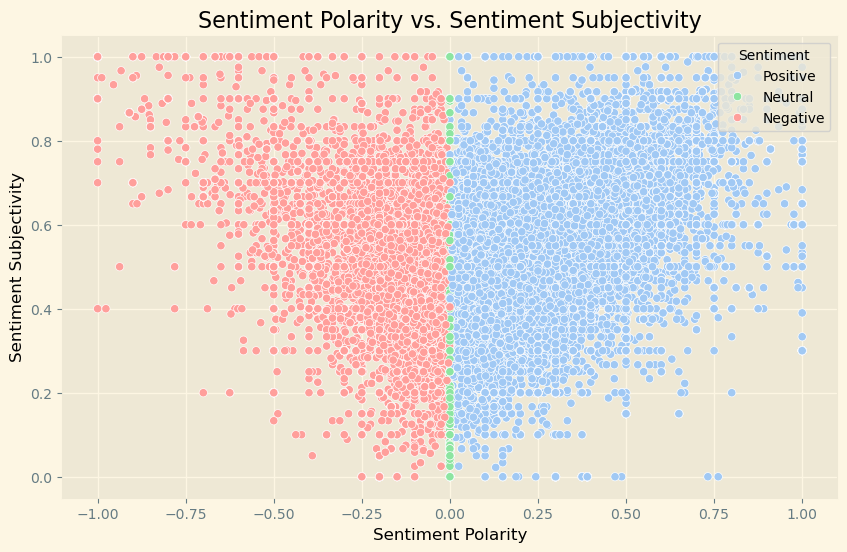

In [21]:
# Set style
plt.style.use('Solarize_Light2')

# Create scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data_visualization['Sentiment_Polarity'], y=data_visualization['Sentiment_Subjectivity'], hue=data_visualization['Sentiment'], palette='pastel6')

# Add title and labels
plt.title('Sentiment Polarity vs. Sentiment Subjectivity', fontsize=16, color='black')
plt.xlabel('Sentiment Polarity', fontsize=12, color='black')
plt.ylabel('Sentiment Subjectivity', fontsize=12, color='black')

# Add legend
plt.legend(title='Sentiment', loc='upper right')

# Show plot
plt.show()

Based on the scatter plot analysis, it can be concluded that the data generally has positive and subjective sentiment. There is some data that has positive and objective sentiment, and there is also data that has negative sentiment.

### 4.5 Text Analysis

The first thing to do when doing text analysis is to check the amount of data in the 'translate_review' column

In [23]:
data_visualization.sample(10)['Translated_Review']

35063    Still improved further. And ppt watching respo...
50067                                         Useless app.
62725    I started using today far I give 4 stars reaso...
28936                                               I love
5769                                     Very full .thanks
5284     As massage therapist I looked simple display t...
47836    Its s**t app, even bother waste data downloadi...
4313     Easier & better Lr mobile. I'm surprised Lr 6 ...
22214                Helps eat I'm already seeing benefits
20102             Love lot live wallpapers. Very cool app.
Name: Translated_Review, dtype: object

In [24]:
# calling function
data_visualization['Review Processed'] = data_visualization['Translated_Review'].apply(preprocess_text)

In [25]:
data_visualization[['Review Processed', 'Sentiment']].sample(10)

,Review Processed,Sentiment
47880,alvia nice,Positive
5715,best hardworking chap,Positive
21779,update online search work m pretty sure stoppe...,Positive
9148,work fast,Positive
40284,thank much,Positive
44301,think ok,Positive
7050,used decent since last update full bug try ope...,Positive
28366,s nice app tell order access decent amount col...,Positive
37392,game great front page phone also without game ...,Positive
40869,found many home longer market nt show house p...,Positive


To make things more efficient and effective, tokenization which is mostly done in feature engineering will be done in EDA as well

#### 4.6.1 Most Common Words of Each Sentiment

In [26]:
# using counter to count the number of words
words = [word for text in data_visualization['Review Processed'] for word in text.split()]

word_freq = Counter(words) # count of each word

In [27]:
# respective Sentiment word count
sentiment_word_freq= {}

for sentiments in data_visualization['Sentiment'].unique():
    words= [word for text in data_visualization[data_visualization['Sentiment'] == sentiments]['Review Processed'] for word in text.split()]
    sentiment_word_freq[sentiments] = Counter(words)

##### 4.6.1.1 Positive Sentiment

In [28]:
# isolating Positive Sentiment
positive_word_freq= sentiment_word_freq['Positive']

print('Top 10 most frequent Positive Sentiment words')
display(positive_word_freq.most_common(10))
print()
print('Top 10 lest frequent Positive Sentiment words')
display(positive_word_freq.most_common()[:-11:-1])

Top 10 most frequent Positive Sentiment words


[('game', 3898),
 ('good', 3771),
 ('great', 3592),
 ('love', 3301),
 ('s', 2912),
 ('like', 2879),
 ('app', 2869),
 ('time', 2579),
 ('get', 2378),
 ('would', 1900)]


Top 10 lest frequent Positive Sentiment words


[('rigorously', 1),
 ('luxury', 1),
 ('predefined', 1),
 ('hyderabad', 1),
 ('uieven', 1),
 ('priceline', 1),
 ('workthen', 1),
 ('kotyadipati', 1),
 ('kon', 1),
 ('kotyadipathi', 1)]

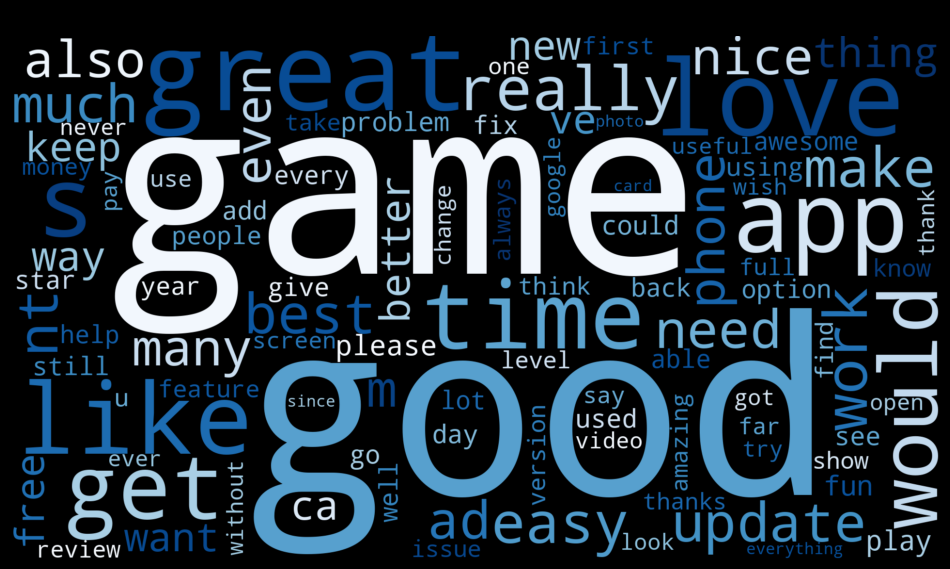

In [29]:
positive_sentiment_wordcloud = WordCloud(width=1920, height=1080,
                                max_words= 100,
                                background_color='black',
                                colormap='Blues').generate_from_frequencies(positive_word_freq)

plt.figure(figsize=(12, 8),facecolor='black')

# Display the word cloud
plt.imshow(positive_sentiment_wordcloud, interpolation='bilinear')
plt.title('Positive Word Cloud')
plt.axis('off')
plt.savefig('positive_wordcloud.png')

plt.show()

The Positive word cloud offers an insightful visualization of commonly used words associated with positive sentiment, featuring terms like **good, game, love, great, like, and time.** These words are frequently employed when individuals express positive sentiments in their reviews or feedback. The prevalence of these terms in the word cloud signifies their significance in describing positive experiences or aspects of products/services. 

##### 4.6.1.2 Negative Sentiment

In [30]:
# Isolating Negative Sentiment
negative_word_freq= sentiment_word_freq['Negative']

print('Top 10 most frequent Negative Sentiment words')
display(negative_word_freq.most_common(10))
print()
print('Top 10 lest frequent Negative Sentiment words')
display(negative_word_freq.most_common()[:-11:-1])

Top 10 most frequent Negative Sentiment words


[('game', 3049),
 ('time', 1303),
 ('get', 1174),
 ('nt', 1006),
 ('s', 991),
 ('like', 908),
 ('ad', 784),
 ('even', 728),
 ('app', 707),
 ('update', 681)]


Top 10 lest frequent Negative Sentiment words


[('reachable', 1),
 ('hyderabad', 1),
 ('kondapur', 1),
 ('housing', 1),
 ('acre', 1),
 ('magicbricks', 1),
 ('backi', 1),
 ('showingowner', 1),
 ('february', 1),
 ('callsproperties', 1)]

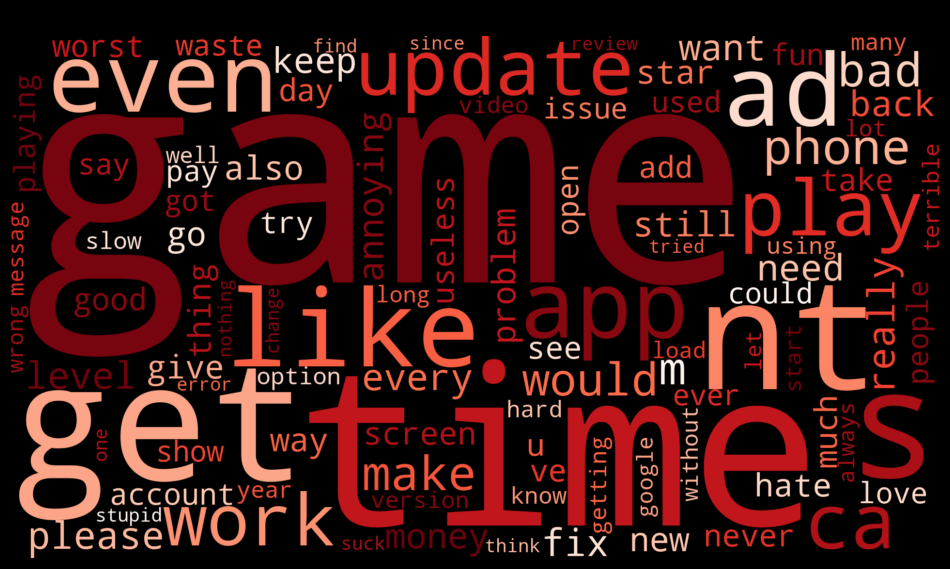

In [31]:
negative_sentiment_wordcloud = WordCloud(width=1920, height=1080,
                                max_words= 100,
                                background_color='black',
                                colormap='Reds').generate_from_frequencies(negative_word_freq)

plt.figure(figsize=(12, 8),facecolor='black')

# Display the word cloud
plt.imshow(negative_sentiment_wordcloud, interpolation='bilinear')
plt.title('Negative Word Cloud')
plt.axis('off')
plt.savefig('negative_wordcloud.png')

plt.show()

The Negative word cloud provides a visual representation of commonly used words associated with negative sentiment, including **game, time, get, nt, s, and like.** These terms are frequently expressed when individuals convey negative sentiments in their reviews or comments. The prominence of these words in the word cloud suggests that they are often used to describe aspects of experiences or products that are perceived negatively. 

##### 4.6.1.3 Neutral Sentiment

In [32]:
# Isolating Neutral Sentiment
neutral_word_freq= sentiment_word_freq['Neutral']

print('Top 10 most frequent Neutral Sentiment words')
display(neutral_word_freq.most_common(10))
print()
print('Top 10 lest frequent Negative Sentiment words')
display(neutral_word_freq.most_common()[:-11:-1])

Top 10 most frequent Neutral Sentiment words


[('nt', 449),
 ('work', 387),
 ('like', 359),
 ('ca', 278),
 ('time', 271),
 ('get', 238),
 ('app', 228),
 ('please', 228),
 ('phone', 222),
 ('s', 219)]


Top 10 lest frequent Negative Sentiment words


[('premise', 1),
 ('planecar', 1),
 ('slc', 1),
 ('rerouted', 1),
 ('questionswill', 1),
 ('loo', 1),
 ('fit', 1),
 ('nicetime', 1),
 ('taxthey', 1),
 ('scammersbooked', 1)]

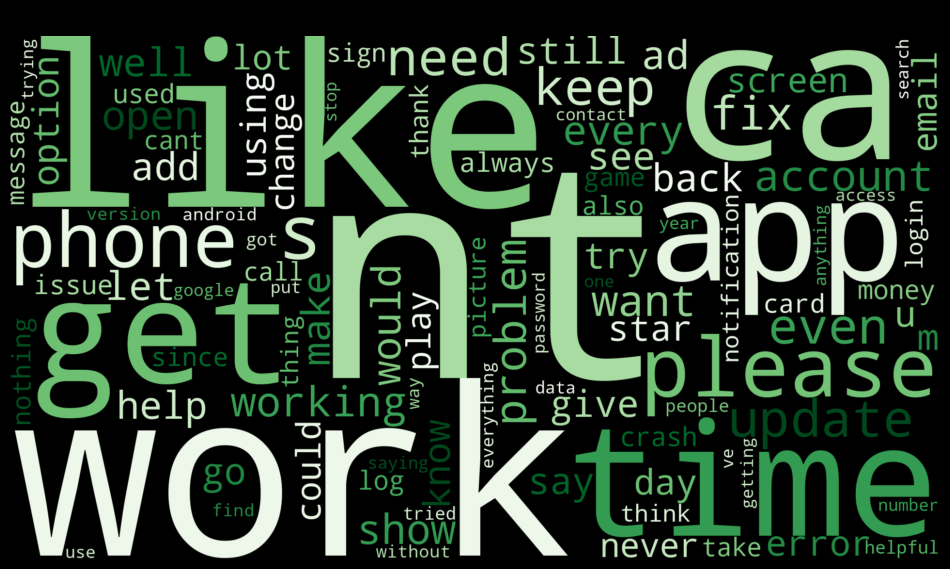

In [33]:
neutral_sentiment_wordcloud = WordCloud(width=1920, height=1080,
                                max_words= 100,
                                background_color='black',
                                colormap='Greens').generate_from_frequencies(neutral_word_freq)

plt.figure(figsize=(12, 8),facecolor='black')

# Display the word cloud
plt.imshow(neutral_sentiment_wordcloud, interpolation='bilinear')
plt.title('Neutral Word Cloud')
plt.axis('off')
plt.savefig('neutral_wordcloud.png')

plt.show()

The Neutral word cloud highlights commonly used words related to neutral sentiment, such as **nt, work, like, ca, time, and please**. These terms are frequently expressed when people describe neutral sentiments, suggesting that they are often used in reviews or comments that convey neither particularly positive nor negative feelings. This word cloud provides insight into the language commonly associated with neutral sentiments in the analyzed dataset.

## 5. Feature Engineering

Before going any further, let's copy the data that we will use in building the model. This is done to avoid things that we don't want in the original data. The data that has been previously loaded will be entered into a new variable where the data in that variable will be processed

In [34]:
# dataframe for machine learning
df = data.copy()

### 5.1 Text Processing for Model

In [35]:
# calling function
df['preprocessed_text'] = df['Translated_Review'].apply(preprocess_text)

In [36]:
df.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity,preprocessed_text
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333,like eat delicious food s m cooking food case ...
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462,help eating healthy exercise regular basis
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000,work great especially going grocery store
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000,best idea u
5,10 Best Foods for You,Best way,Positive,1.00,0.300000,best way


Words will be the features in NLP. Reducing uncessary words leads to quicker model, and higher accuracy since the model can learn the pattern more with less noise

### 5.2 Target Conversion

**Target Conversion** involves processing target labels on a dataset to prepare it for applying a machine learning model. In this context, labeling is carried out in the 'Sentiment' column by replacing the value 'Positive' to 0, 'Negative' to 1, and 'Neutral' to 2. The aim of this step is to change the sentiment category into a numerical representation that can be understood by the algorithm machine learning. Thus, the dataset is ready to be used in creating models that can carry out predictions or further analysis regarding sentiment based on the available data.

In [37]:
# labelling the target
df['label'] = df['Sentiment'].replace({'Positive' : 0, 'Negative' : 1, 'Neutral' : 2})

# Displays the first 10 data
df.head(10)

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity,preprocessed_text,label
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333,like eat delicious food s m cooking food case ...,0
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462,help eating healthy exercise regular basis,0
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000,work great especially going grocery store,0
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000,best idea u,0
5,10 Best Foods for You,Best way,Positive,1.00,0.300000,best way,0
6,10 Best Foods for You,Amazing,Positive,0.60,0.900000,amazing,0
8,10 Best Foods for You,"Looking forward app,",Neutral,0.00,0.000000,looking forward app,2
9,10 Best Foods for You,It helpful site ! It help foods get !,Neutral,0.00,0.000000,helpful site help food get,2
10,10 Best Foods for You,good you.,Positive,0.70,0.600000,good,0
11,10 Best Foods for You,Useful information The amount spelling errors ...,Positive,0.20,0.100000,useful information amount spelling error quest...,0


After carrying out the target conversion on the dataset, the next step is to check the balance of each sentiment that has been labeled. By checking this balance, we can find out whether there is a significant imbalance between the amount of data representing each sentiment.

In [38]:
# Check for Balance
df['label'].value_counts()

label
0    19015
1     6321
2     4356
Name: count, dtype: int64

Based on the output obtained, there are **19.015 data that have been labeled as positive sentiment** (label 0), **6,321 data with negative sentiment labels** (label 1), and **4,356 data with neutral sentiment labels** (label 2). From this data, it can be seen that the distribution between the three sentiments is not balanced, with the amount of positive sentiment data far greater than negative and neutral sentiment.

### 5.3 Data Splitting

First of all, we will divide the data into training data, validation data and test data with certain proportions. This process is important in preparing data for modeling, as it allows objective evaluation of model performance. We will divide the data in the 'label' and 'preprocessed_text' columns into these three parts. Because the amount of data we have is quite large, we will take 20% of the total data as test data and 12.5% of the train data will be used as validation data

In [39]:
# Splitting Data into Train and Test Data
X_train_val, X_test, y_train_val, y_test = train_test_split(df.preprocessed_text,
                                                    df.label,
                                                    test_size=0.20,
                                                    random_state=22,
                                                    stratify=df.label)

# Splitting Train Data into Train and Validation Data
X_train, X_val, y_train, y_val = train_test_split(X_train_val,
                                                  y_train_val,
                                                  test_size=0.125,
                                                  random_state=42,
                                                  stratify=y_train_val)

print('Train Size : ', X_train.shape)
print('Val Size   : ', X_val.shape)
print('Test Size  : ', X_test.shape)

Train Size :  (20783,)
Val Size   :  (2970,)
Test Size  :  (5939,)


The results of dividing the data into three parts, namely training data, validation data and test data, show the proportion of samples that have been adjusted. The training data has 20,783 samples, the validation data has 2,970 samples, and the test data has 5,939 samples. This proportion is important to ensure that each part of the dataset has sufficient representation, with training data used to train the model, validation data to evaluate the model during training, and test data to test the model's performance after training.

After dividing the data into three parts, we will also carry out the label encoding process using a one-hot encoder to prepare the target data in a form that suits the needs of the machine learning model that will be used.

In [40]:
# onehot encoder
y_train_ohe = to_categorical(y_train)
y_val_ohe = to_categorical(y_val)
y_test_ohe = to_categorical(y_test)
y_train_ohe

array([[0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       ...,
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.]], dtype=float32)

The encoding results show the representation of the target category after the one-hot encoding process. Each row in the array represents one data sample, where the value 1 in each column indicates the relevant category. In this case, there are three target categories: 0, 1, and 2.

### 5.4 Text Vectorization

Text Vectorization is the process of converting text into numerical vectors by counting the frequency of each word in the text. The simplest form is the Bag-of-Words model, which creates a vocabulary of all unique words and assigns each word a unique number. Then, for each document or piece of text, it counts the number of times each word appears.

In [41]:
# vectorization
Vectorize = CountVectorizer()
X_train_vec = Vectorize.fit_transform(X_train)
X_test_vec = Vectorize.transform(X_test)

X_train_vec

<20783x16944 sparse matrix of type '<class 'numpy.int64'>'
	with 263744 stored elements in Compressed Sparse Row format>

The output above shows the text representation in sparse matrix form after the vectorization process. In this context, the matrix has dimensions 20783 x 14791, which means there are 20783 text samples (documents) and 14791 unique features used in the vectorization process. Sparse matrix shows that most of the matrix elements have zero values, so only those elements that have non-zero values are stored. In total, there are 264219 non-zero elements stored in Compressed Sparse Row (CSR) format

In [42]:
# Total vocab and verbs
total_vocab = len(Vectorize.vocabulary_.keys())
max_sen_len = max([len(i.split(" ")) for i in X_train])

print('Total Vocab : ', total_vocab)
print('Maximum Sentence Length : ', max_sen_len, 'tokens')

Total Vocab :  16944
Maximum Sentence Length :  310 tokens


The vectorization process uses a total of 14791 different vocabularies. Additionally, the maximum length of sentences in the training dataset is 320 tokens. This maximum length indicates considerable variation in sentence length within the dataset

In [43]:
# text vectorize
text_vectorization = TextVectorization(max_tokens=total_vocab,
                                       standardize=None,
                                       split="whitespace",
                                       ngrams=None,
                                       output_mode="int",
                                       output_sequence_length=max_sen_len,
                                       input_shape=(1,))

text_vectorization.adapt(X_train)

We have finished the text vectorization process using TextVectorization from TensorFlow. The parameters used when vectorizing text are:
- **max_tokens** which is set according to the total vocab that has been calculated previously
- **split** to separate text based on spaces
- **output_mode** set as "int" to produce output in integer form
- **output_sequence_length** adjusted to the maximum length of sentences in the training dataset
- **input_shape** set as (1,) to configure data input

Next we will look at data that has been transformed using text vectorization

In [44]:
## Result of Text Vectorization
print('Result of  Text Vectorization')
print(text_vectorization([df.preprocessed_text[0]]))
print('Vector size : ', text_vectorization([df.preprocessed_text[0]]).shape)
print('')

Result of  Text Vectorization
tf.Tensor(
[[   4  812 2861  171    5   22 1247  171  794   31  171   66   62   26
    31 3681  197    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0  

The resulting vector has a size of (1, 320), where 1 is the amount of data processed and 320 is the maximum length of a predetermined sentence. The vector represents words in a sentence with an integer value that corresponds to the index of the word in the word dictionary (vocabulary).

### 5.5 Word Embedding

Word Embeddings is a type of word representation that allows words with similar meaning to have a similar representation. It is a distributed representation that is learned from the text and can capture contextual cues and semantic similarity. Embeddings capture more nuanced information and relationships between words.

In [45]:
# Embedding
embedding = Embedding(input_dim=total_vocab,
                      output_dim=128,
                      embeddings_initializer="uniform",
                      input_length=max_sen_len)

we have finished defining the Embedding layer using Keras. The parameters used in this Embedding layer are as follows:

- **input_dim**: Total number of words in vocabulary (total_vocab).
- **output_dim**: Output dimensions for the embedding vector, in this case 128.
- **embeddings_initializer**: Method for initializing embedding weights, in this case using the uniform method.
- **input_length**: Length of the input sequence, in this case using the maximum value of sentence length (max_sen_len).

Next, we will see examples of data that have gone through the embedding stage

In [46]:
## Result of  Embedding
print('Result of  Embedding')
print(embedding(text_vectorization([df.preprocessed_text[0]])))
print('Vector size : ', embedding(text_vectorization([df.preprocessed_text[0]])).shape)

Result of  Embedding
tf.Tensor(
[[[ 4.9445044e-02 -2.5068808e-02  3.8672239e-05 ...  1.6607117e-02
    2.3663267e-03  1.8948544e-02]
  [ 1.8837009e-02  8.9186542e-03 -3.3405244e-02 ...  1.6115893e-02
   -2.2486186e-02  1.6524065e-02]
  [-4.0938091e-02  3.2141376e-02 -5.3738430e-04 ... -3.5011064e-02
    2.0674620e-02  3.2561947e-02]
  ...
  [ 3.5457779e-02 -3.1976461e-02 -2.1173967e-02 ... -2.9541099e-02
   -3.2907084e-02  1.6545001e-02]
  [ 3.5457779e-02 -3.1976461e-02 -2.1173967e-02 ... -2.9541099e-02
   -3.2907084e-02  1.6545001e-02]
  [ 3.5457779e-02 -3.1976461e-02 -2.1173967e-02 ... -2.9541099e-02
   -3.2907084e-02  1.6545001e-02]]], shape=(1, 310, 128), dtype=float32)
Vector size :  (1, 310, 128)


The output above shows the results of the Embedding layer. The resulting tensor has the form (1, 320, 128), which indicates that each word in the sentence has been converted into an embedding vector with dimension 128.

## 6. ANN Training 

In this section, we delve into the training process of Artificial Neural Networks (ANNs). ANNs are a fundamental class of machine learning models inspired by the structure and function of the human brain. Throughout this section, we will cover three key aspects of ANN training: model definition, model training, and model evaluation. Each of these sub-sections plays a crucial role in the overall process of training ANNs and assessing their performance. Through these stages, we aim to develop and optimize ANNs to effectively learn from data and make accurate predictions across various tasks.

### 6.1 Model Definition

we will develop two models to analyze the sentiment of app review texts in the Google Play Store. The first model we will use is Long Short-Term Memory (LSTM). Apart from LSTM, we will also use a conventional RNN model as a comparison. Using these two models will allow us to compare their performance in predicting user sentiment towards applications, as well as explore the advantages and disadvantages of each in the context of text sentiment analysis.

#### 6.1.1 LSTM Model Definition

In this section, we define the architecture of our model for sentiment analysis using LSTM (Long Short-Term Memory) neural networks. LSTM is a type of recurrent neural network (RNN) model architecture that is able to handle text problems well, especially in modeling temporal relationships between word tokens in text. We will use several parameters in this base model, namely:
1. **Seed:** Seed is used to set the same initial value for the random number generator, so that the experimental results can be reproduced with the same consistency.
2. **Text Vectorization:** This layer is responsible for converting text into a numerical representation. This can include text tokenization, conversion of words to numeric indices, and adjustment of sequence length.
3. **Embedding:** This layer converts the one-hot encoding representation of words into an embedding vector. This embedding allows the model to learn richer and more contextual representations of words.
4. **LSTM (Long Short-Term Memory):** The LSTM layer is used to model temporal relationships in text data sequences. Parameter 25 indicates the number of LSTM units used in this layer. kernel_initializer is used to initialize the LSTM kernel weights. GlorotUniform is one of the commonly used weight initializations.
5. **Dense Layer:** Dense layer with softmax activation is used as the output layer to produce a probability distribution of the target classes. The number of units in this layer corresponds to the desired number of classes, in this case 3 because the model performs multiclass classification.

In [47]:
# Clear previous session and set random seeds
seed = 20
np.random.seed(seed)
tf.random.set_seed(seed)

## Model Architecture
lstm_1 = Sequential()
lstm_1.add(text_vectorization)
lstm_1.add(embedding)
lstm_1.add(LSTM(25, kernel_initializer=tf.keras.initializers.GlorotUniform(seed)))
lstm_1.add(Dense(3, activation='softmax'))

# Compile the Model
lstm_1.compile(loss='categorical_crossentropy', optimizer='adam', metrics='accuracy')

# Model Summary
lstm_1.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization (TextVe  (None, 310)               0         
 ctorization)                                                    
                                                                 
 embedding (Embedding)       (None, 310, 128)          2168832   
                                                                 
 lstm (LSTM)                 (None, 25)                15400     
                                                                 
 dense (Dense)               (None, 3)                 78        
                                                                 
Total params: 2184310 (8.33 MB)
Trainable params: 2184310 (8.33 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Sequential Model is a linear sequence of layers arranged sequentially one by one. Based on the model summary above, the model architecture consists of :
1. **Text Vectorization (TextVectorization):** This layer converts text into a numeric representation with a fixed sequence length of **310**. There are **no trainable parameters** in this layer.
2. **Embedding:** This layer converts the numerical representation of the text into an embedding vector with a fixed sequence length of **310** and an embedding dimension of **128.**
3. **LSTM (LSTM):** The LSTM layer is used to process input sequences of length **310** and produce output of length **25.**
4. **Dense:** Dense layers with softmax activation are used to generate probability distributions of target classes. The output has **length 3** because the model performs multiclass classification.
5. **Total Parameters:** The total parameters of this model are **2,184,310**, with all parameters trainable. This includes the number of parameters that can be trained (Trainable params) of **2,184,310** and parameters that cannot be trained (Non-trainable params) of **0.**

#### 6.1.2 RNN Model Definition

Recurrent Neural Network (RNN) is a type of artificial neural network architecture specifically designed to handle sequential data or data that depends on previous contexts. RNNs have the ability to "remember" information from previous times in a data sequence, making them suitable for tasks involving sequential data such as text, audio, and time series. The designed model consists of several key components:
1. **Text Vectorization Layer:** Used to convert text into a numerical representation that can be processed by the model.
2. **Embedding Layer:** Aims to generate a vector representation of the words in the text, taking into account the relationships between words.
3. **SimpleRNN Layer:** Leverages a simple RNN unit with 64 units to sequentially process vector representations and capture sequential patterns in text.
4. **Dense Layer:** Includes a Dense layer with a softmax activation function to generate sentiment predictions consisting of three classes: positive, negative, and neutral.

In [71]:
# model
seed = 20
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)
rnn_units = 64

model_rnn = Sequential()
model_rnn.add(text_vectorization)
model_rnn.add(embedding)
model_rnn.add(SimpleRNN(rnn_units))
model_rnn.add(Dense(units=3, activation='softmax'))

model_rnn.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model_rnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization (TextVe  (None, 310)               0         
 ctorization)                                                    
                                                                 
 embedding (Embedding)       (None, 310, 128)          2168832   
                                                                 
 simple_rnn (SimpleRNN)      (None, 64)                12352     
                                                                 
 dense (Dense)               (None, 3)                 195       
                                                                 
Total params: 2181379 (8.32 MB)
Trainable params: 2181379 (8.32 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


The RNN model summary above provides information about the architecture and parameters of the model created. The following is an explanation for each piece of information listed:
1. **Model Name ("sequential"):** The model name given by Keras by default. This model is a Sequential type, which means the layers are built sequentially one after another.
2. **Layer (Type):** The type of layer used in the model along with the layer name. In this model, there are four types of layers:
    - **TextVectorization:** This layer is used to convert text into a vector representation.
    - **Embedding:** This layer is responsible for mapping words into dense word space vectors.
    - **SimpleRNN:** This layer is a Simple Recurrent Neural Network layer that has 64 units.
    - **Dense:** This layer is a fully connected layer with 3 units and uses a softmax activation function.
3. **Output Shape:** The output shape of each layer in the model for the specified batch size (None in the batch dimension).

In the given RNN model,**the total parameters (Total params) are 2,181,379**, consisting of **2,181,379 trainable parameters** and **0 non-trainable parameters.** This number of parameters reflects the complexity of the model and affects training time as well as the memory capacity required when training the model.

### 6.2 Model Training

In this section, we will carry out training on the LSTM and RNN models that were created previously.

#### 6.2.1 LSTM Model Training

we will proceed with training the LSTM model defined previously. This involves feeding the training data into the model and adjusting its internal parameters iteratively over multiple epochs to minimize the defined loss function. Additionally, we will monitor the model's performance on the validation dataset to ensure it is not overfitting and to evaluate its generalization capabilities. The training process will be conducted for a total of 30 epochs, and we will validate the model's performance using the validation data.

In [48]:
# Training model LSTM
lstm_hist = lstm_1.fit(X_train, y_train_ohe, epochs=30, validation_data=(X_val, y_val_ohe))

Epoch 1/30

650/650 [==============================] - 105s 152ms/step - loss: 0.8997 - accuracy: 0.6404 - val_loss: 0.8964 - val_accuracy: 0.6404
Epoch 2/30
650/650 [==============================] - 101s 156ms/step - loss: 0.8981 - accuracy: 0.6404 - val_loss: 0.8973 - val_accuracy: 0.6404
Epoch 3/30
650/650 [==============================] - 62s 95ms/step - loss: 0.8973 - accuracy: 0.6404 - val_loss: 0.8968 - val_accuracy: 0.6404
Epoch 4/30
650/650 [==============================] - 63s 97ms/step - loss: 0.8971 - accuracy: 0.6404 - val_loss: 0.9007 - val_accuracy: 0.6404
Epoch 5/30
650/650 [==============================] - 63s 98ms/step - loss: 0.8974 - accuracy: 0.6404 - val_loss: 0.8964 - val_accuracy: 0.6404
Epoch 6/30
650/650 [==============================] - 65s 99ms/step - loss: 0.8967 - accuracy: 0.6404 - val_loss: 0.8974 - val_accuracy: 0.6404
Epoch 7/30
650/650 [==============================] - 64s 98ms/step - loss: 0.8970 - accuracy: 0.6404 - val_loss: 0.8964 - val_accu

We're done training the model that we make. Let's evaluate our model in the next step

#### 6.2.1 RNN Model Training

we will proceed with training the RNN model defined previously. This involves feeding the training data into the model and adjusting its internal parameters iteratively over multiple epochs to minimize the defined loss function. Additionally, we will monitor the model's performance on the validation dataset to ensure it is not overfitting and to evaluate its generalization capabilities. The training process will be conducted for a total of 30 epochs, and we will validate the model's performance using the validation data.

In [72]:
# Training model LSTM
rnn_hist = model_rnn.fit(X_train, y_train_ohe, epochs=30, validation_data=(X_val, y_val_ohe))

Epoch 1/30
650/650 [==============================] - 55s 80ms/step - loss: 0.9012 - accuracy: 0.6392 - val_loss: 0.8977 - val_accuracy: 0.6404
Epoch 2/30
650/650 [==============================] - 50s 77ms/step - loss: 0.8718 - accuracy: 0.6388 - val_loss: 0.8573 - val_accuracy: 0.6266
Epoch 3/30
650/650 [==============================] - 52s 80ms/step - loss: 0.8443 - accuracy: 0.6433 - val_loss: 0.8537 - val_accuracy: 0.6259
Epoch 4/30
650/650 [==============================] - 50s 78ms/step - loss: 0.8447 - accuracy: 0.6392 - val_loss: 0.8589 - val_accuracy: 0.6249
Epoch 5/30
650/650 [==============================] - 50s 78ms/step - loss: 0.8437 - accuracy: 0.6400 - val_loss: 0.8566 - val_accuracy: 0.6253
Epoch 6/30
650/650 [==============================] - 50s 77ms/step - loss: 0.8436 - accuracy: 0.6409 - val_loss: 0.8603 - val_accuracy: 0.6236
Epoch 7/30
650/650 [==============================] - 49s 76ms/step - loss: 0.8436 - accuracy: 0.6388 - val_loss: 0.8523 - val_accuracy:

We're done training the model that we make. Let's evaluate our model in the next step

### 6.3 Model Evaluation

#### 6.3.1 LSTM Model Evaluation

We will evaluate the performance of the trained LSTM model. This evaluation will be conducted by visualizing the trends of accuracy versus validation accuracy and loss versus validation loss over the course of training epochs. These visualizations will provide insights into how well the model has learned from the training data and how effectively it generalizes to unseen validation data. By examining these metrics, we can assess the model's overall performance and identify any potential issues such as overfitting or underfitting.

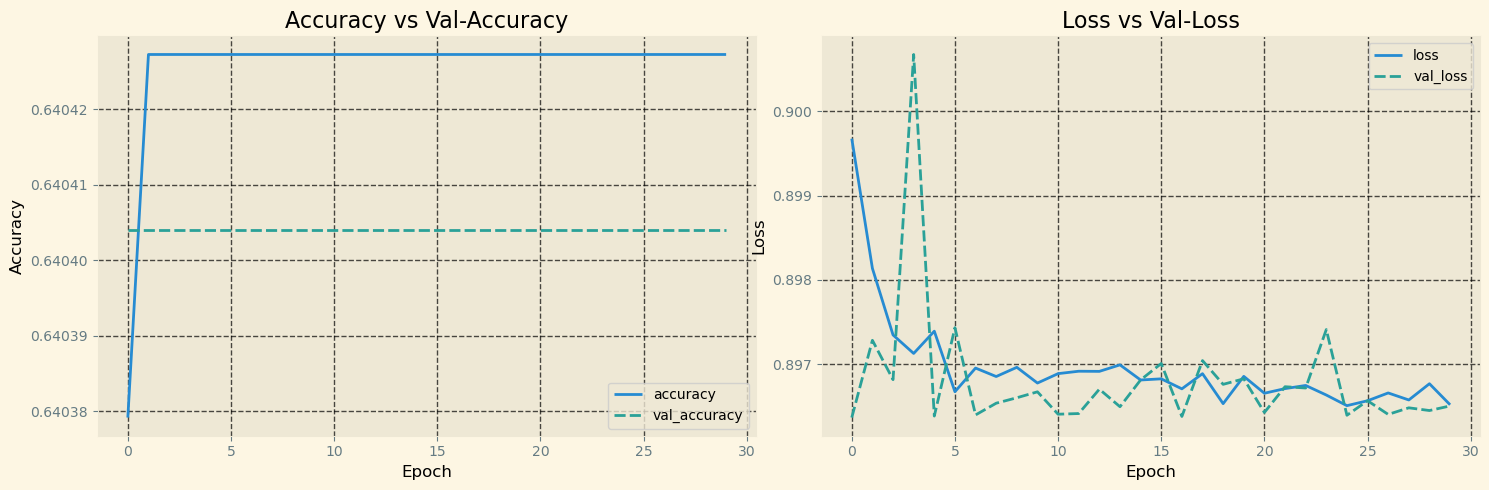

In [75]:
# Plot the Result
plot_result(lstm_hist)

The graph above is a visualization of the loss journey and also the accuracy in each epoch. Loss refers to the loss function used during model training, while accuracy refers to how well the model can classify the given data.  
- **Model Fit:** There are indications of **overfitting** in the observed model. **Overfitting** occurs when the model starts learning specific details in the training data and **loses the ability to generalize to new data.** This can be seen from the significant difference between accuracy on training data and validation data. Although accuracy on training data tended to increase, accuracy on validation data remained stable at around 64%, indicating that the model was unable to generalize patterns learned from training data to validation data. 
- **Accuracy:** Accuracy on training data and validation data remained in the same range throughout the epoch, with an accuracy value of approximately 64% for both training and validation data. Although there is a small increase in accuracy in the first few epochs, accuracy remains stable thereafter.
- **Loss:** Although there was a decrease in loss on the training data as the epoch progressed, the loss on the validation data remained stable at around 0.896, indicating that the model was unable to reduce prediction errors on data it had never seen before.

the trained model does not show significant progress during training. Accuracy and loss on validation data did not show a significant increase, indicating that the model was not able to generalize patterns from training data to data that had never been seen before well.

#### 6.3.2 RNN Model Evaluation

We will evaluate the performance of the trained RNN model. This evaluation will be conducted by visualizing the trends of accuracy versus validation accuracy and loss versus validation loss over the course of training epochs. These visualizations will provide insights into how well the model has learned from the training data and how effectively it generalizes to unseen validation data. By examining these metrics, we can assess the model's overall performance and identify any potential issues such as overfitting or underfitting.

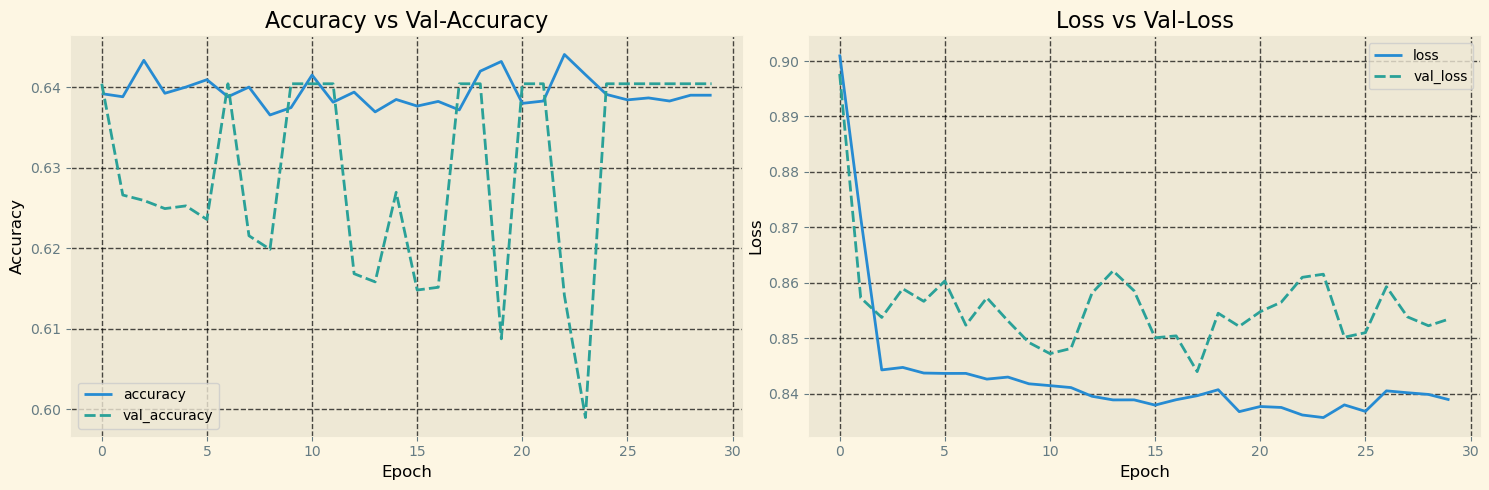

In [76]:
# Plot the Result
plot_result(rnn_hist)

The graph above is a visualization of the loss journey and also the accuracy in each epoch. Loss refers to the loss function used during model training, while accuracy refers to how well the model can classify the given data.
- **Model Fit:** There are indications that the model is overfitting. Overfitting occurs when a model performs well on training data, but cannot generalize well on data it has never seen before, such as validation data or new data. It can be seen that accuracy on validation data tends to fluctuate as the epoch progresses, while accuracy on training data tends to be stable around the value of 0.64.
- **Loss:** From the training results, it can be seen that the loss in the training data and validation data tends to be stable around a certain value, where in the train data it is around 0.83 - 0.84 and in the validation data it is around 0.84 - 0.86. This indicates that the model does not experience a significant increase in predictive ability as the epoch progresses.
- **Accuracy:** Accuracy is a metric that shows how well the model is at predicting the correct labels from the training data. At each epoch, accuracy is calculated for both training data and validation data. From the training results, it can be seen that the accuracy on training data and validation data also tends to be stable around a certain value. Although there were quite large fluctuations in the validation data, there was no significant increase in accuracy as the epoch progressed.

From the training results, it can be concluded that the RNN model does not show a significant increase in performance over time. In addition, there are indications of overfitting as shown by the significant difference between accuracy on training data and validation data.

#### 6.3.3 Evaluation on LSTM and RNN models

We will evaluate and compare the performance of the two models based on relevant evaluation metrics, such as accuracy and loss. This analysis aims to understand which model is more effective in predicting sentiment from text. First, we will evaluate the LSTM model on train data, test data, and validation data

In [53]:
# LSTM Model EValuate on Training Data
print('Train Data Evaluate :')
lstm_base_train_evaluate = lstm_1.evaluate(X_train, y_train_ohe)
print(' ')

# LSTM Model EValuate on Validation Data
print('Validation Data Evaluate :')
lstm_base_val_evaluate = lstm_1.evaluate(X_val, y_val_ohe)
print(' ')

# LSTM Model EValuate on Testing Data
print('Test Data Evaluate :')
lstm_base_test_evaluate = lstm_1.evaluate(X_test,y_test_ohe)

Train Data Evaluate :
  3/650 [..............................] - ETA: 18s - loss: 0.9612 - accuracy: 0.5833

650/650 [==============================] - 17s 27ms/step - loss: 0.8964 - accuracy: 0.6404
 
Validation Data Evaluate :
93/93 [==============================] - 2s 26ms/step - loss: 0.8965 - accuracy: 0.6404
 
Test Data Evaluate :
186/186 [==============================] - 5s 28ms/step - loss: 0.8963 - accuracy: 0.6405


In [77]:
# RNN Model Evaluate on Training Data
print('Train Data Evaluate :')
rnn_base_train_evaluate = model_rnn.evaluate(X_train, y_train_ohe)
print(' ')

# RNN Model Evaluate on Validation Data
print('Validation Data Evaluate :')
rnn_base_val_evaluate = model_rnn.evaluate(X_val, y_val_ohe)
print(' ')

# RNN Model Evaluate on Testing Data
print('Test Data Evaluate :')
rnn_base_test_evaluate = model_rnn.evaluate(X_test,y_test_ohe)

Train Data Evaluate :
650/650 [==============================] - 14s 22ms/step - loss: 0.8382 - accuracy: 0.6404
 
Validation Data Evaluate :
93/93 [==============================] - 2s 22ms/step - loss: 0.8535 - accuracy: 0.6404
 
Test Data Evaluate :
186/186 [==============================] - 4s 22ms/step - loss: 0.8562 - accuracy: 0.6405


In [79]:
# Create DataFrame for evaluation LSTM results
evaluation_df = pd.DataFrame({
    'Loss Train': [lstm_base_train_evaluate[0]],
    'Loss Validation': [lstm_base_val_evaluate[0]],
    'Loss Test': [lstm_base_test_evaluate[0]],
    'Train Accuracy': [lstm_base_train_evaluate[1]],
    'Validation Accuracy': [lstm_base_val_evaluate[1]],
    'Test Accuracy': [lstm_base_test_evaluate[1]]
}, index=['Base model LSTM'])

# Create DataFrame for evaluation LSTM results
evaluation_rnn = pd.DataFrame({
    'Loss Train': [rnn_base_train_evaluate[0]],
    'Loss Validation': [rnn_base_val_evaluate[0]],
    'Loss Test': [rnn_base_test_evaluate[0]],
    'Train Accuracy': [rnn_base_train_evaluate[1]],
    'Validation Accuracy': [rnn_base_val_evaluate[1]],
    'Test Accuracy': [rnn_base_test_evaluate[1]]
}, index=['Base model RNN'])

# Concatenate the existing DataFrame with the new DataFrame for the improved model
base_evaluation = pd.concat([evaluation_df, evaluation_rnn])

# Display the combined DataFrame
base_evaluation


,Loss Train,Loss Validation,Loss Test,Train Accuracy,Validation Accuracy,Test Accuracy
Base model LSTM,0.896417,0.896502,0.896327,0.640427,0.640404,0.640512
Base model RNN,0.838241,0.853479,0.856171,0.640427,0.640404,0.640512


Based on the information above, it can be seen that the RNN model has slightly better performance than the LSTM model based on loss on validation data and test data. However, both the LSTM model and the RNN model show the same accuracy on training data, validation data and test data. Therefore, although the RNN model has lower loss on validation data and test data, significant performance improvement is not observed.

Based on this analysis, we choose the LSTM model as the base model to further improve and improve its performance. The process of improving an LSTM model includes tuning hyperparameters, adding layers or nodes, or regularization techniques to reduce overfitting, with the aim of increasing accuracy and reducing loss in validation data and test data.

## 7. ANN Improvement 
We will explore various strategies and techniques to improve the performance of pre-trained Artificial Neural Network (ANN) models. Although the basic ANN model provides unsatisfactory results as previously observed, we will try to optimize the model and improve its performance.

### 7.1 Model Definition

Wita will make adjustments and optimizations to the neural network model that has been prepared previously to process text data. We will make various adjustments to the model architecture, including adding layers, tuning parameters, and using regularization techniques to improve model performance and generalization.Improvements that will be used in this model architecture are:
- **Bidirectional LSTM Layers:** Two LSTM layers capable of processing information from the past and future.
- **Dropout Layers:** Two dropout layers used to reduce overfitting by randomly disabling some units.
- **Dense Layer:** Fully connected layer with softmax activation to produce output class probabilities.
- **Learning Rate (lr):** The default learning rate value of the Adam optimizer.
- **Callbacks:** Three callbacks are used in model training, namely EarlyStopping to stop training if there is no significant increase in - validation loss, ModelCheckpoint to save the model with the best validation loss, and ReduceLROnPlateau to reduce the learning rate if - validation loss does not decrease after several epochs.

In [56]:
# Clear previous session and set random seeds
seed = 20
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

# Model Architecture
model_tuned = Sequential()
model_tuned.add(text_vectorization)
model_tuned.add(embedding)
model_tuned.add(Bidirectional(LSTM(32, return_sequences=True, kernel_regularizer=l2(0.1), dropout=0.1, kernel_initializer=tf.keras.initializers.GlorotUniform(seed),)))
model_tuned.add(Dropout(0.1))
model_tuned.add(Bidirectional(LSTM(64, kernel_regularizer=l2(0.1), dropout=0.1, kernel_initializer=tf.keras.initializers.GlorotUniform(seed),)))
model_tuned.add(Dropout(0.1))
model_tuned.add(Dense(3, activation='softmax'))

# Compile the Model
model_tuned.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Callbacks for Training
callbacks1= [
    EarlyStopping(monitor='val_loss', patience=5),
    ModelCheckpoint('model_checkpoint.tf', monitor='val_loss',save_best_only=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6)]

# Model Summary
model_tuned.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization (TextVe  (None, 310)               0         
 ctorization)                                                    
                                                                 
 embedding (Embedding)       (None, 310, 128)          2168832   
                                                                 
 bidirectional (Bidirection  (None, 310, 64)           41216     
 al)                                                             
                                                                 
 dropout (Dropout)           (None, 310, 64)           0         
                                                                 
 bidirectional_1 (Bidirecti  (None, 128)               66048     
 onal)                                                           
                                                        

The architecture of this model consists of several layers. First, there is a Text Vectorization layer that converts text into a numeric representation. Then, the Embedding layer converts the numerical representation into a low-dimensional space vector. Next, there are two Bidirectional LSTM layers that process information from the past and future. To reduce overfitting, two Dropout layers are used with a dropout probability of 0.1. Finally, there is the Dense layer which is a fully connected layer with a softmax activation function to produce output class probabilities. The total parameters that can be changed in this model are 1,928,643.

### 7.2 Model Training

We will explore the process of training and evaluating the neural network model that we defined previously.

In [57]:
# Model Training
best_model = model_tuned.fit(
    X_train, y_train_ohe, epochs=30, validation_data=(X_val, y_val_ohe),
    callbacks=callbacks1
    )

Epoch 1/30


650/650 [==============================] - ETA: 0s - loss: 3.7912 - accuracy: 0.6869INFO:tensorflow:Assets written to: model_checkpoint.tf\assets


INFO:tensorflow:Assets written to: model_checkpoint.tf\assets


650/650 [==============================] - 186s 268ms/step - loss: 3.7912 - accuracy: 0.6869 - val_loss: 0.6492 - val_accuracy: 0.7347 - lr: 0.0010
Epoch 2/30
650/650 [==============================] - ETA: 0s - loss: 0.5779 - accuracy: 0.7749INFO:tensorflow:Assets written to: model_checkpoint.tf\assets


INFO:tensorflow:Assets written to: model_checkpoint.tf\assets


650/650 [==============================] - 168s 259ms/step - loss: 0.5779 - accuracy: 0.7749 - val_loss: 0.5728 - val_accuracy: 0.7714 - lr: 0.0010
Epoch 3/30
650/650 [==============================] - ETA: 0s - loss: 0.4295 - accuracy: 0.8566INFO:tensorflow:Assets written to: model_checkpoint.tf\assets


INFO:tensorflow:Assets written to: model_checkpoint.tf\assets


650/650 [==============================] - 171s 263ms/step - loss: 0.4295 - accuracy: 0.8566 - val_loss: 0.4797 - val_accuracy: 0.8394 - lr: 0.0010
Epoch 4/30
650/650 [==============================] - 154s 237ms/step - loss: 0.3168 - accuracy: 0.9046 - val_loss: 0.5086 - val_accuracy: 0.8370 - lr: 0.0010
Epoch 5/30
650/650 [==============================] - ETA: 0s - loss: 0.2748 - accuracy: 0.9280INFO:tensorflow:Assets written to: model_checkpoint.tf\assets


INFO:tensorflow:Assets written to: model_checkpoint.tf\assets


650/650 [==============================] - 182s 281ms/step - loss: 0.2748 - accuracy: 0.9280 - val_loss: 0.4648 - val_accuracy: 0.8599 - lr: 0.0010
Epoch 6/30
650/650 [==============================] - 181s 278ms/step - loss: 0.2194 - accuracy: 0.9434 - val_loss: 0.5168 - val_accuracy: 0.8431 - lr: 0.0010
Epoch 7/30
650/650 [==============================] - 169s 259ms/step - loss: 0.1993 - accuracy: 0.9511 - val_loss: 0.5464 - val_accuracy: 0.8327 - lr: 0.0010
Epoch 8/30
650/650 [==============================] - 205s 316ms/step - loss: 0.1719 - accuracy: 0.9579 - val_loss: 0.5031 - val_accuracy: 0.8566 - lr: 0.0010
Epoch 9/30
650/650 [==============================] - 199s 306ms/step - loss: 0.1123 - accuracy: 0.9771 - val_loss: 0.4827 - val_accuracy: 0.8650 - lr: 2.0000e-04
Epoch 10/30
650/650 [==============================] - 202s 311ms/step - loss: 0.0972 - accuracy: 0.9792 - val_loss: 0.5073 - val_accuracy: 0.8704 - lr: 2.0000e-04


We're done training the model that we make. Let's evaluate our model in the next step

### 7.3 Model Evaluation

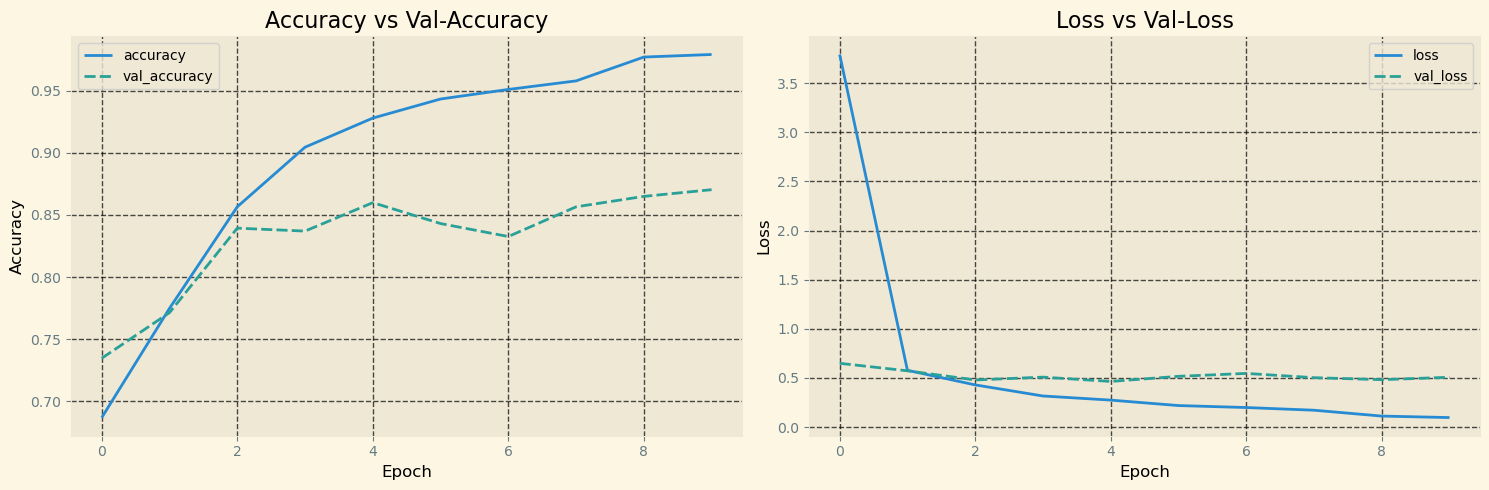

In [58]:
# plot result

plot_result(best_model)

The graph above is a visualization of the loss journey and also the accuracy in each epoch. Loss refers to the loss function used during model training, while accuracy refers to how well the model can classify the given data.  
- **Loss:** Loss on the training data decreased significantly from 3.7912 in the first epoch to 0.0972 in the 10th epoch. **This shows that the model succeeded in minimizing prediction errors on the training data over time.**
- **Accuracy:** Accuracy on validation data also **increases as loss on training data decreases**, from 73.47% in the first epoch to 87.04% in the 10th epoch. However, there was a slight decrease in accuracy at the 9th epoch, possibly due to learning rate adjustments made at that point.

**The model has demonstrated the ability to learn patterns from training data and apply them to validation data well.** Although there was a decrease in accuracy at some epochs, overall, the model managed to improve its performance and was able to generalize well on data that had never been seen before.

In [59]:
print('Train Data Evaluate :')
lstm_tuned_train_evaluate = model_tuned.evaluate(X_train, y_train_ohe)
print(' ')

print('Validation Data Evaluate :')
lstm_tuned_val_evaluate = model_tuned.evaluate(X_val, y_val_ohe)
print(' ')

print('Test Data Evaluate :')
lstm_tuned_test_evaluate = model_tuned.evaluate(X_test,y_test_ohe)

Train Data Evaluate :
650/650 [==============================] - 105s 162ms/step - loss: 0.0799 - accuracy: 0.9838
 
Validation Data Evaluate :
93/93 [==============================] - 14s 151ms/step - loss: 0.5073 - accuracy: 0.8704
 
Test Data Evaluate :
186/186 [==============================] - 28s 152ms/step - loss: 0.5396 - accuracy: 0.8666


Based on the performance evaluation results of the model that has been tuned (model_tuned) on three different datasets, training data (Train), validation data (Validation), and testing data (Test), we can conclude that :
1. **Train Data Evaluate:** The model shows excellent performance on training data with very low loss (0.0799) and high accuracy (0.9838). This shows that the model is able to learn patterns well in the training data.
2. **Validation Data Evaluate:** Model performance on validation data is slightly lower than on training data, but still relatively good. Although the loss value is slightly higher (0.5073) and the accuracy is slightly lower (0.8704) compared to the training data, it still shows solid performance on data that was not used during training.
3. **Test Data Evaluate:** The model shows similar performance on test data, with relatively stable loss (0.5396) and accuracy (0.8666) values. This indicates that the model is able to generalize patterns found in training and validation data to new data that was not seen before.

**The tuned model performs well on all datasets, with consistently high accuracy.** Even though there is a slight decrease in performance on validation and testing data compared to training data, the model performance is still relatively good and **able to produce accurate predictions.** the model has learned well and is able to generalize patterns from the training data to new data not seen before.

In [62]:
# Create DataFrame for improved model evaluation results
improved_evaluation_df = pd.DataFrame({
    'Loss Train': [lstm_tuned_train_evaluate[0]],
    'Loss Validation': [lstm_tuned_val_evaluate[0]],
    'Loss Test': [lstm_tuned_test_evaluate[0]],
    'Train Accuracy': [lstm_tuned_train_evaluate[1]],
    'Validation Accuracy': [lstm_tuned_val_evaluate[1]],
    'Test Accuracy': [lstm_tuned_test_evaluate[1]]
}, index=['LSTM Updated'])

# Concatenate the existing DataFrame with the new DataFrame for the improved model
combined_evaluation_df = pd.concat([evaluation_df, improved_evaluation_df])

# Display the combined DataFrame
combined_evaluation_df

,Loss Train,Loss Validation,Loss Test,Train Accuracy,Validation Accuracy,Test Accuracy
Base model LSTM,0.896417,0.896502,0.896327,0.640427,0.640404,0.640512
LSTM Updated,0.079874,0.507315,0.539567,0.983785,0.870370,0.866644


The table above shows the results of the work from the base model with the improved model. Based on these results, we can conclude that The **updated LSTM model (LSTM Updated) shows significant improvements in performance compared to the base LSTM model.** With lower loss rates and higher accuracy rates, the updated LSTM model has a better ability to produce accurate predictions on data not seen during training. The **updated LSTM model also shows better signs of avoiding overfitting compared to the base model.**

Test - Set


186/186 [==============================] - 26s 139ms/step


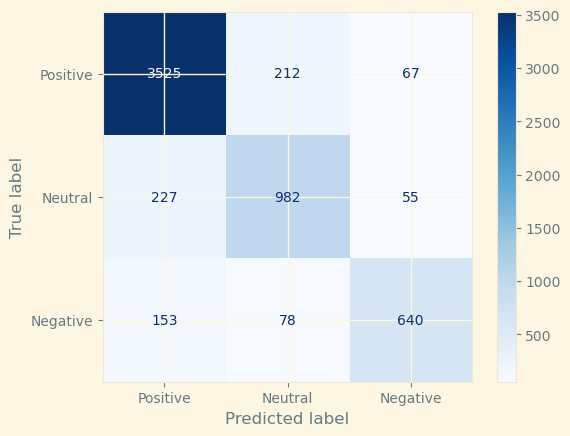

              precision    recall  f1-score   support

    Positive       0.90      0.93      0.91      3804
     Neutral       0.77      0.78      0.77      1264
    Negative       0.84      0.73      0.78       871

    accuracy                           0.87      5939
   macro avg       0.84      0.81      0.82      5939
weighted avg       0.87      0.87      0.87      5939



In [64]:
# result
print('Test - Set')
performance_check(model_tuned, X_test, y_test_ohe)

We can see that the model has good performance in classifying application text reviews into three sentiment categories, with balanced values between precision and recall for each category. However, there is still room for improvement, especially in the Negative category where recall and f1-score are slightly lower compared to other categories.

## 8. Model Saving

In [65]:
# Model Saving
dump(stop_words, 'stopword_list.joblib')
model_tuned.save('best_model.keras')

## 9. Model Inference

The Inference Model is at P2G7_Ogi-Hadicahyo_inference.ipynb

## 10. Conclusion

We developed a Natural Language Processing (NLP) model to predict user sentiment from text reviews of apps in the Google Play Store. This model will help app developers analyze and understand user sentiment automatically. We will use two models, namely Long Short-Term Memory (LSTM) and conventional RNN models, to analyze the sentiment of app reviews on the Google Play Store.

Although RNN is slightly better in terms of loss on validation and test data, both LSTM and RNN have the same accuracy on all types of data. Therefore, we choose LSTM as the base model to be further improved.

The updated LSTM model shows significant performance improvements compared to the base LSTM model. With lower loss rates and higher accuracy rates, updated LSTM models have a better ability to produce accurate predictions on data not seen during training. Additionally, the updated LSTM model also shows better signs of avoiding overfitting compared to the baseline model.